In [1]:
import pandas as pd

df = pd.read_csv("transformed_dataset.csv")

In [2]:
# AdaBoost without SMOTE 

import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import matthews_corrcoef, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

X = df.loc[:, 'Precipitation':'Slope']
y = df['Severity_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Encode class labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)



#class_counts = y_train_smote.value_counts()
#print("Class counts after SMOTE: ", class_counts)

# AdaBoost model
ada = AdaBoostClassifier(random_state=42)

# Grid search parameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1]
}


# Set up the StratifiedKFold
cv = StratifiedKFold(n_splits=5)

# Set up the GridSearchCV with the SVM model, parameter grid, and stratified cross-validation
grid_search = GridSearchCV(ada, param_grid, cv=cv, scoring=make_scorer(matthews_corrcoef), verbose=1, n_jobs=-1)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Print the best model and its accuracy
#print("Best model info:", grid_search.best_estimator_)
print("Best model parameters:", grid_search.best_params_)
print("Training MCC:", grid_search.best_score_)

# Make predictions using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate the evaluation metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')


# Get probability estimates for each class
y_prob = grid_search.best_estimator_.predict_proba(X_test)

# Compute the multiclass AUC-ROC score
auc_roc = roc_auc_score(y_test, y_prob, average='macro', multi_class='ovo')

# Print the evaluation metrics
#print("Test Accuracy:", accuracy)
print("Test MCC:", matthews_corrcoef(y_test, y_pred))
#print("Macro averaged precision:", macro_precision)
#print("Macro averaged recall:", macro_recall)
#print("Macro averaged F1-score:", macro_f1)
#print("Micro averaged precision:", micro_precision)
#print("Micro averaged recall:", micro_recall)
#print("Micro averaged F1-score:", micro_f1)
print("AUC-ROC score:", auc_roc)

clf_report = classification_report(y_test, y_pred, target_names = le.classes_)
print("Classification report:\n", clf_report)

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_mat)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/nassimali-chaouche/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best model parameters: {'learning_rate': 0.001, 'n_estimators': 50}
Training MCC: 0.10634761065310691
Test MCC: 0.029683796198342556
AUC-ROC score: 0.5364484737580627
Classification report:
               precision    recall  f1-score   support

           A       0.00      0.00      0.00         2
           B       0.45      0.73      0.56       129
           C       0.27      0.32      0.30        71
           D       0.00      0.00      0.00        38
           E       0.00      0.00      0.00        25
           F       0.00      0.00      0.00        27

    accuracy                           0.40       292
   macro avg       0.12      0.18      0.14       292
weighted avg       0.27      0.40      0.32       292

Confusion matrix:
 [[ 0  1  1  0  0  0]
 [ 0 94 35  0  0  0]
 [ 0 48 23  0  0  0]
 [ 0 26 12  0  0  0]
 [ 0 17  8  0  0  0]
 [ 0 22  5  0  0  0]]


/Users/nassimali-chaouche/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nassimali-chaouche/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nassimali-chaouche/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

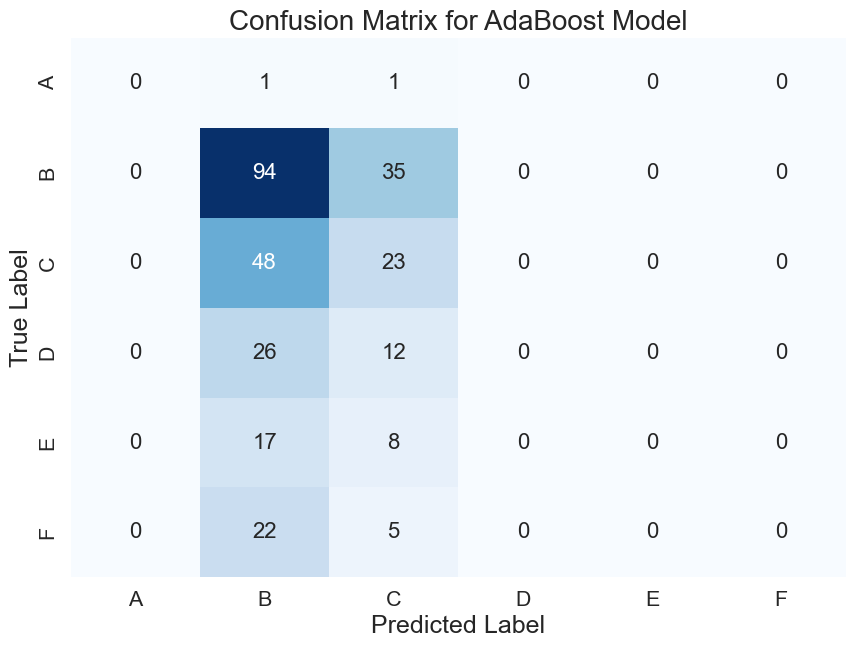

In [3]:
# Plot confusion matrix using Seaborn

class_labels = le.classes_

plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # Increase font size
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.title('Confusion Matrix for AdaBoost Model', fontsize=20)
plt.show()

In [4]:
# GBM without SMOTE 

import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import matthews_corrcoef, make_scorer
import seaborn as sns

X = df.loc[:, 'Precipitation':'Slope']
y = df['Severity_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Encode class labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)



#class_counts = y_train_smote.value_counts()
#print("Class counts after SMOTE: ", class_counts)

# GBM model
gbm = GradientBoostingClassifier(random_state=42)

# Grid search parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}


# Set up the StratifiedKFold
cv = StratifiedKFold(n_splits=5)

# Set up the GridSearchCV with the SVM model, parameter grid, and stratified cross-validation
grid_search = GridSearchCV(gbm, param_grid, cv=cv, scoring=make_scorer(matthews_corrcoef), verbose=1, n_jobs=-1)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Print the best model and its accuracy
#print("Best model info:", grid_search.best_estimator_)
print("Best model parameters:", grid_search.best_params_)
print("Training MCC:", grid_search.best_score_)

# Make predictions using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate the evaluation metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
macro_precision, macro_recall, macro_f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
micro_precision, micro_recall, micro_f1, _ = precision_recall_fscore_support(y_test, y_pred, average='micro')


# Get probability estimates for each class
y_prob = grid_search.best_estimator_.predict_proba(X_test)

# Compute the multiclass AUC-ROC score
auc_roc = roc_auc_score(y_test, y_prob, average='macro', multi_class='ovo')

# Print the evaluation metrics
#print("Test Accuracy:", accuracy)
print("Test MCC:", matthews_corrcoef(y_test, y_pred))
#print("Macro averaged precision:", macro_precision)
#print("Macro averaged recall:", macro_recall)
#print("Macro averaged F1-score:", macro_f1)
#print("Micro averaged precision:", micro_precision)
#print("Micro averaged recall:", micro_recall)
#print("Micro averaged F1-score:", micro_f1)
print("AUC-ROC score:", auc_roc)

clf_report = classification_report(y_test, y_pred, target_names = le.classes_)
print("Classification report:\n", clf_report)

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_mat)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/Users/nassimali-chaouche/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best model parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Training MCC: 0.15148357633459733
Test MCC: 0.10273987856965881
AUC-ROC score: 0.5239116670394754
Classification report:
               precision    recall  f1-score   support

           A       0.00      0.00      0.00         2
           B       0.50      0.70      0.58       129
           C       0.32      0.25      0.28        71
           D       0.10      0.05      0.07        38
           E       0.20      0.08      0.11        25
           F       0.26      0.22      0.24        27

    accuracy                           0.40       292
   macro avg       0.23      0.22      0.21       292
weighted avg       0.35      0.40      0.37       292

Confusion matrix:
 [[ 0  1  1  0  0  0]
 [ 1 90 21  8  3  6]
 [ 1 38 18  7  2  5]
 [ 0 24 10  2  0  2]
 [ 0 12  5  2  2  4]
 [ 0 15  1  2  3  6]]


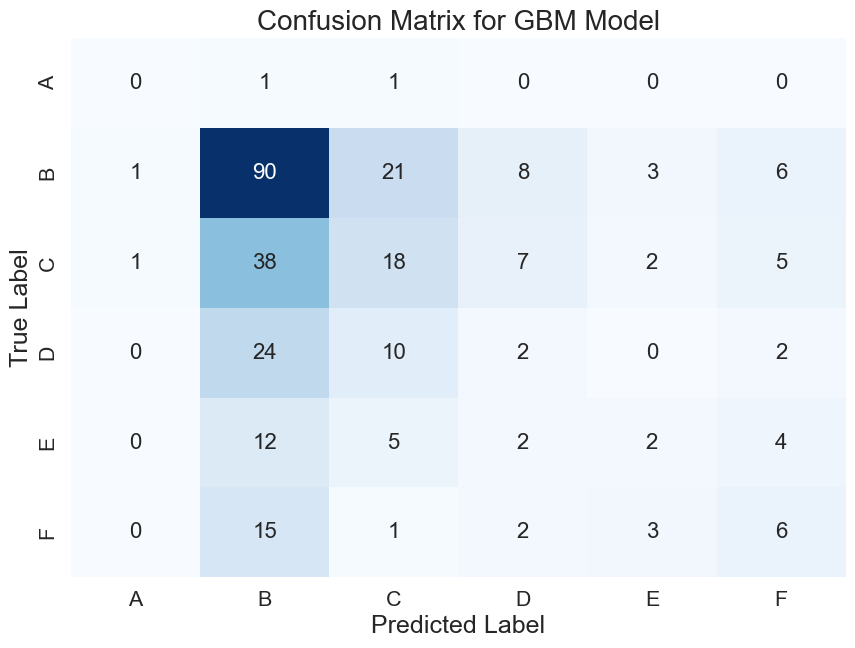

In [5]:
# Plot confusion matrix using Seaborn

class_labels = le.classes_

plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # Increase font size
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.title('Confusion Matrix for GBM Model', fontsize=20)
plt.show()